In [2]:
import sys
import requests #package for http requests
import bs4 # package for html parsing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import date
import seaborn as sns

pd.set_option('display.max_rows', 5000)

In [3]:
f1data = pd.read_csv('C:\\Users\\ashto\\Desktop\\INFO Phase III Data.csv')
f1data = f1data[['Driver','Car','Laps','Time/Retired','PTS','Starting Position','Ending Position','Year','Positions Gained','Salary','Cost per Point']]
f1data.head()

,Driver,Car,Laps,Time/Retired,PTS,Starting Position,Ending Position,Year,Positions Gained,Salary,Cost per Point
0,Sebastian Vettel,Red Bull Racing Renault,58.0,1:29:30.259,25.0,1.0,1,2011,0,9280000,371200.000000
1,Sebastian Vettel,Red Bull Racing Renault,56.0,1:37:39.832,25.0,1.0,1,2011,0,9280000,371200.000000
2,Sebastian Vettel,Red Bull Racing Renault,56.0,+5.198s,18.0,1.0,2,2011,-1,9280000,515555.555556
3,Sebastian Vettel,Red Bull Racing Renault,58.0,1:30:17.558,25.0,1.0,1,2011,0,9280000,371200.000000
4,Sebastian Vettel,Red Bull Racing Renault,66.0,1:39:03.301,25.0,2.0,1,2011,1,9280000,371200.000000


In [4]:
#Multiple regression salary with car to predict points
list_of_cars = set(f1data['Car'])
list_of_cars

#need to change car column so 1 if expensive car, 0 if not 
dictcar = {'Alfa Romeo Racing Ferrari':1,
 'AlphaTauri Honda':0,
 'Alpine Renault':0,
 'Aston Martin Mercedes':1,
 'Ferrari':1,
 'Force India Mercedes':0,
 'Haas Ferrari':0,
 'Lotus Renault':0,
 'McLaren Honda':0,
 'McLaren Mercedes':0,
 'McLaren Renault':0,
 'Mercedes':1,
 'Racing Point BWT Mercedes':0,
 'Red Bull Racing Honda':1,
 'Red Bull Racing Renault':1,
 'Red Bull Racing TAG Heuer':1,
 'Renault':1,
 'STR Ferrari':0,
 'Sauber Ferrari':0,
 'Scuderia Toro Rosso Honda':0,
 'Toro Rosso Ferrari':0,
 'Williams Cosworth':0,
 'Williams Mercedes':0,
 'Williams Renault':0}

f1data['Mapped Car Value']= f1data['Car'].map(dictcar)
f1data.head()

#team spending on cars: https://beyondtheflag.com/2019/11/06/formula-1-current-team-budgets-175m-cap-impending/

,Driver,Car,Laps,Time/Retired,PTS,Starting Position,Ending Position,Year,Positions Gained,Salary,Cost per Point,Mapped Car Value
0,Sebastian Vettel,Red Bull Racing Renault,58.0,1:29:30.259,25.0,1.0,1,2011,0,9280000,371200.000000,1
1,Sebastian Vettel,Red Bull Racing Renault,56.0,1:37:39.832,25.0,1.0,1,2011,0,9280000,371200.000000,1
2,Sebastian Vettel,Red Bull Racing Renault,56.0,+5.198s,18.0,1.0,2,2011,-1,9280000,515555.555556,1
3,Sebastian Vettel,Red Bull Racing Renault,58.0,1:30:17.558,25.0,1.0,1,2011,0,9280000,371200.000000,1
4,Sebastian Vettel,Red Bull Racing Renault,66.0,1:39:03.301,25.0,2.0,1,2011,1,9280000,371200.000000,1


Multiple Regression:
Coefficeint: [5.81902076e+00 1.32584573e-07]
Intercept: 4.49
Correlation (r): 0.38


Linear Regression:
Coefficeint: [1.85707083e-07]
Intercept: 7.21
Correlation (r): 0.24


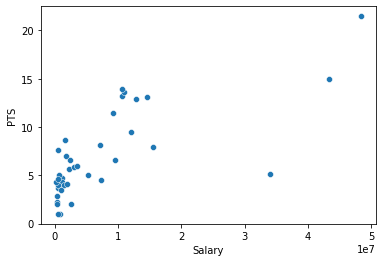

In [7]:
x= f1data[['Mapped Car Value', 'Salary']]
y=f1data['PTS']

regressor = LinearRegression()
regressor.fit(x,y)
ypred = regressor.predict(f1data[['Mapped Car Value', 'Salary']])


plt.show()
print("Multiple Regression:")
print("Coefficeint:",regressor.coef_)
print("Intercept:",round(regressor.intercept_,2))
print("Correlation (r):", round(regressor.score(x,y),2))


x1= f1data[['Salary']]
y1=f1data['PTS']
regressor1 = LinearRegression()
regressor1.fit(x1,y1)
ypred1 = regressor1.predict(f1data[['Salary']])


print("\n")
print("Linear Regression:")
print("Coefficeint:",regressor1.coef_)
print("Intercept:",round(regressor1.intercept_,2))
print("Correlation (r):", round(regressor1.score(x1,y1),2))

#plot
ff1data=f1data.groupby('Driver').mean()
sx = ff1data['Salary']
sy=ff1data['PTS']
sns.scatterplot(x=sx,y=sy,data=ff1data)
plt.show()

Coefficeint: [-7.34694470e-01 -2.22630015e-08]
Intercept: 2.85
Correlation (r): 0.02


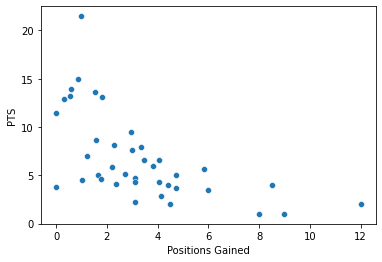

In [43]:
#positions gained regression
x= f1data[['Mapped Car Value', 'Salary']]
y=f1data['Positions Gained']

regressor = LinearRegression()
regressor.fit(x,y)
ypred = regressor.predict(f1data[['Mapped Car Value', 'Salary']])


plt.show()
print("Coefficeint:",regressor.coef_)
print("Intercept:",round(regressor.intercept_,2))
print("Correlation (r):", round(regressor.score(x,y),2))

#plot regression
ff1data=f1data.groupby('Driver').mean()
sx = ff1data['Positions Gained']
sy=ff1data['PTS']
sns.scatterplot(x=sx,y=sy,data=ff1data)
plt.show()

In [ ]:
#create end graph with 45 degree angle that is predicted value on x and actual on y to see underperform and overperform

In [54]:
#2021
def actual_performance(Driver,Year):
    driver = f1data[(f1data['Driver']==Driver)&(f1data['Year']==Year)]
    driver = driver.groupby('Driver').mean()
    return driver

predicted_performance = (regressor1.coef_*actual_performance('Lewis Hamilton',2021)['Salary']) + regressor1.intercept_
actual = actual_performance('Lewis Hamilton',2021)['PTS']

index = round(actual/predicted_performance,2)*100
print("Performance: ",index)

Performance:  Driver
Lewis Hamilton    116.0
dtype: float64


In [58]:
#list of drivers in 2021
drivers = ['Lewis Hamilton','Max Verstappen','Valtteri Bottas','Sergio Perez','Daniel Ricciardo']
year = 2021
performance_list = pd.DataFrame()
for driver in drivers:
    intermediate = pd.DataFrame()
    predicted_performance = (regressor1.coef_*actual_performance(driver,year)['Salary']) + regressor1.intercept_
    actual = actual_performance(driver,year)['PTS']
    index = round(actual/predicted_performance,2)*100
    intermediate['Score'] = index
    intermediate['Driver'] = driver
    performance_list = performance_list.append(intermediate,ignore_index=True)

performance_list = performance_list[['Driver','Score']]
scores = performance_list.sort_values(['Score'], ascending=[0])
scores

,Driver,Score
1,Max Verstappen,184.0
2,Valtteri Bottas,167.0
3,Sergio Perez,149.0
0,Lewis Hamilton,116.0
4,Daniel Ricciardo,70.0


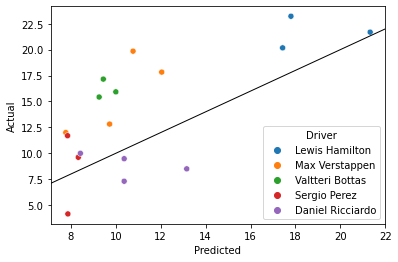

In [76]:
#input
drivers = ['Lewis Hamilton','Max Verstappen','Valtteri Bottas','Sergio Perez','Daniel Ricciardo']
years = [2021,2020,2019,2017]

#build DataFrame
performance_list = pd.DataFrame()
for driver in drivers:
    for year in years:
        intermediate = pd.DataFrame()
        predicted_performance = (regressor1.coef_*actual_performance(driver,year)['Salary']) + regressor1.intercept_
        actual = actual_performance(driver,year)['PTS']
        intermediate['Actual'] = actual
        intermediate['Predicted'] = predicted_performance
        intermediate['Driver'] = driver
        performance_list = performance_list.append(intermediate,ignore_index=True)

#plot results
x=performance_list['Predicted']
y=performance_list['Actual']
sns.scatterplot(x=x,y=y,hue='Driver',data=performance_list)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='k', lw=1, scalex=False, scaley=False)
plt.show()